# Working on Vesta features

Let's suppose most feature engineering has been done already in the *V* columns, let's :

1. PCA / TSNE / UMAP
2. AE / DAE / VAE

Links

- [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
- [In Depth: Principal Component Analysis
](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Denoising Autoencoder: Part III – Practical implementation in Representation Learning](http://dkopczyk.quantee.co.uk/dae-part3/)
- [1st place with representation learning](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/44629)
- [Dimensionality reduction using Keras Auto Encoder](https://www.kaggle.com/saivarunk/dimensionality-reduction-using-keras-auto-encoder)

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset.make_dataset import Dataset

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plots look better and clearer in svg format
%config InlineBackend.figure_format = 'png' #'svg'

# Some aesthetic settings
plt.style.use('bmh')
sns.set(style = 'whitegrid', font_scale = 0.8, rc={"grid.linewidth": 0.5, "lines.linewidth": 1})

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from src.features.build_features import clean_inf_nan

import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot_reduction(df):
    fig, ax = plt.subplots(figsize = (8,8))
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA', fontsize = 15)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets, colors):
        indicesToKeep = df['isFraud'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 15)
    ax.legend(targets)
    ax.grid()

## Build data

In [4]:
ds = Dataset()
ds.load_dataset("30000")
clean_inf_nan(ds)

As a first, study only those feature engineered features

In [7]:
V_cols = [col for col in ds.X_train.columns.values if col[0]=='V']
print(f'We have {len(V_cols)} VESTA engineered columns')

We have 46 VESTA engineered columns


In [8]:
X_train = ds.X_train[V_cols].values.astype('float32')
X_test = ds.X_test[V_cols].values.astype('float32')
y_train = ds.y_train.reset_index()['isFraud']

In [9]:
print(f"There are {np.sum((X_train < 0).ravel())} negative values")

There are 684137 negative values


In [10]:
X_train[np.isnan(X_train)] = 0

## PCA

In [11]:
X_train = StandardScaler().fit_transform(X_train)

In [12]:
pca = PCA(n_components=2, random_state=42)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

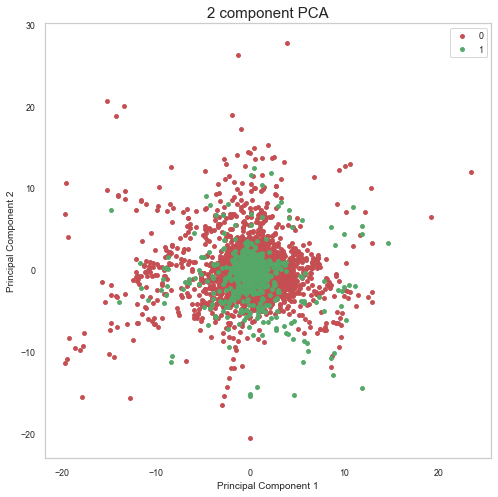

In [13]:
plot_reduction(finalDf)

In [5]:
from src.features.reduce_dimensions import VestaReducer
reducer = VestaReducer(ds)
reducer.pca(ds)
reducer.drop_v_cols(ds)

In [6]:
ds.X_train.head(5)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,V0_pca,V1_pca,V2_pca,V3_pca,V4_pca,V5_pca,V6_pca,V7_pca,V8_pca,V9_pca,V10_pca,V11_pca,V12_pca,V13_pca,V14_pca,V15_pca,V16_pca,V17_pca,V18_pca,V19_pca,V20_pca,V21_pca,V22_pca,V23_pca,V24_pca,V25_pca,V26_pca,V27_pca,V28_pca,V29_pca,V30_pca,V31_pca,V32_pca,V33_pca,V34_pca,V35_pca,V36_pca,V37_pca,V38_pca,V39_pca,V40_pca,V41_pca,V42_pca,V43_pca,V44_pca,V45_pca
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.511909,-0.572309,0.723756,-0.395545,-0.286271,1.136477,0.525400,-0.053973,0.027074,-0.256207,-0.235735,0.147332,0.020360,-3.584460,2.775614,1.852088,0.675506,-0.055479,0.641023,-0.345791,-1.539260,0.449095,-0.520066,0.855521,0.013802,0.203629,-0.200926,-0.103099,0.139515,1.039485,0.375325,0.511341,-0.111159,0.369378,-1.106272,0.423445,0.348872,-0.230594,0.439216,0.669369,0.427166,0.063187,0.204406,-0.121827,-0.283140,-0.288260
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.140207,0.589449,0.036228,-0.681415,0.425823,0.052599,-1.689242,0.478706,0.627585,0.503897,-0.272947,0.116059,-0.834402,1.048268,0.616844,-3.293703,0.558318,0.661178,-0.122237,-0.188702,1.416523,0.569033,0.966344,-0.028652,-0.362314,0.441218,0.404640,-0.055730,0.747016,0.959658,0.280881,1.222434,-0.159146,0.116315,-0.675775,0.579418,0.398606,0.035530,0.167786,0.556813,0.232059,0.097810,0.063522,0.177930,0.253077,-0.213485
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.330371,1.193864,1.319405,-0.271848,-0.677258,2.088747,2.314062,-0.951916,-0.826402,-0.691748,-0.458475,-0.271935,-0.868120,-3.280644,2.429438,-1.339683,0.475710,0.754889,0.013472,-0.060185,0.143265,0.112995,-0.048987,0.611791,-0.313455,0.290686,0.100678,0.213947,-0.465988,0.198462,0.129493,-0.667080,0.088390,0.216846,-0.460259,0.035905,-0.040572,-0.169735,0.271137,0.377642,0.119940,0.198029,-0.131870,0.035530,-0.092468,-0.054030
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.932142,2.149196,3.820599,9.003866,-2.526090,-15.824726,3.003154,-0.135830,-3.055619,-2.354981,-0.790477,-7.781487,-1.286262,0.038868,-0.851560,-3.899360,8.347135,-7.809420,0.350994,-2.922907,-4.010955,-2.890086,0.563290,-3.380307,1.516014,-2.049956,-4.503856,-2.752063,5.021668,-7.355124,-2.960417,-1.331232,2.422163,-0.932173,-4.692092,-0.66

In [21]:
X_train.shape

(60000, 46)

In [20]:
principalComponents[:,0].shape

(60000,)

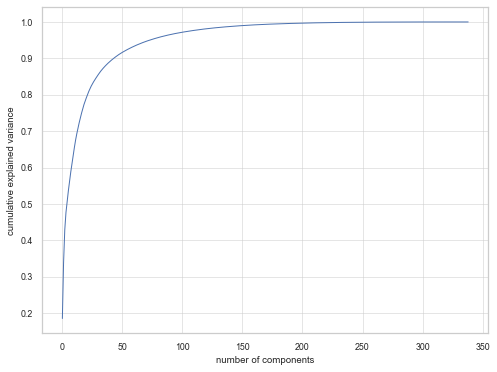

In [168]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(np.cumsum(PCA().fit(X_train).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
fig.show()

## TSNE

Darn, it's slow, don't run on full dataset, favor UMAP

In [120]:
# ran only on 30000 elements
tsne = TSNE(n_components=2, random_state=0)
principalComponents = tsne.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

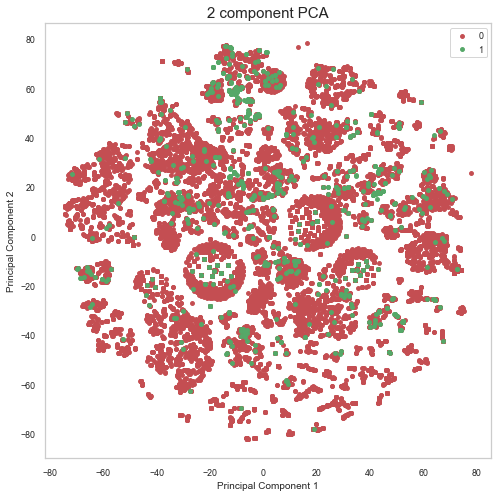

In [121]:
plot_reduction(finalDf)

## UMAP

In [169]:
reducer = umap.UMAP(random_state=42)
principalComponents = reducer.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

LinAlgError: 4-th leading minor of the array is not positive definite

In [ ]:
plot_reduction(finalDf)

#### Supervised UMAP

In [ ]:
reducer = umap.UMAP(random_state=42)
principalComponents = reducer.fit_transform(X_train, y=y_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

In [ ]:
plot_reduction(finalDf)

From https://www.kaggle.com/c/ieee-fraud-detection/discussion/106540612828 code to gather these V variables into 15 groups so that each group has the same number of missing value.

In [ ]:
def find_Vgroups(X, V_variables):
    na_value = X[V_variables].isnull().sum()
    na_list = na_value.unique()
    na_value = na_value.to_dict()
    cols_same_null = []
    for i in range(len(na_list)):
        cols_same_null.append([k for k,v in na_value.items() if v == na_list[i]])
    return cols_same_null
    
V_groups = find_Vgroups(X, [i for i in list(X) if 'V' in i])

## Autoencoder

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)

In [32]:
# this is the size of our encoded representations
encoding_dim = 128

# this is our input placeholder
input_layer = Input(shape=(len(V_cols),), name='input_layer')
x = Dense(256, activation='relu')(input_layer)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', name='encoded_layer')(x)
x = Dense(256, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(len(V_cols), activation='sigmoid', name='decoded_layer')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 339)]             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               87040     
_________________________________________________________________
encoded_layer (Dense)        (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
decoded_layer (Dense)        (None, 339)               87123     
Total params: 240,083
Trainable params: 240,083
Non-trainable params: 0
_________________________________________________________________


In [33]:
# this model maps an input to its encoded representation
encoder = Model(input_layer, encoded)

In [36]:
# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.get_layer('encoded_layer')
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

ValueError: Input 0 of layer encoded_layer is incompatible with the layer: expected axis -1 of input shape to have value 256 but received input with shape [None, 128]

In [26]:
autoencoder.compile(optimizer='adadelta', loss='mse')

In [27]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - ETA: 12s - loss: na - ETA: 1s - loss: na - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - 1s 44us/sample - loss: nan - val_loss: nan
Epoch 2/10
30000/30000 [==============================] - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - 1s 41us/sample - loss: nan - val_loss: nan
Epoch 3/10
30000/30000 [==============================] - ETA: 1s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s - loss: n - ETA: 0s